## **Google Drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image

data_path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/midterm_project/data'

image_train = []
label_train = []
nclass = 43
image_size = 32

for i in range(nclass):
    train_path = os.path.join(data_path, 'Train', str(i))
    images = os.listdir(train_path)
    for j in images:
        image = Image.open(train_path + '/' + j)
        image = image.resize((image_size, image_size))
        image = np.array(image)
        image_train.append(image)
        label_train.append(i)

image_train = np.array(image_train)
label_train = np.array(label_train)

print('The shape of the image_train is:', image_train.shape)
print('The shape of the label_train is:', label_train.shape)
        

The shape of the image_train is: (39209, 32, 32, 3)
The shape of the label_train is: (39209,)


## **Random seed**

In [ ]:
random_seed = 123
np.random.seed(random_seed)

##**Plot images loaded in image_train**

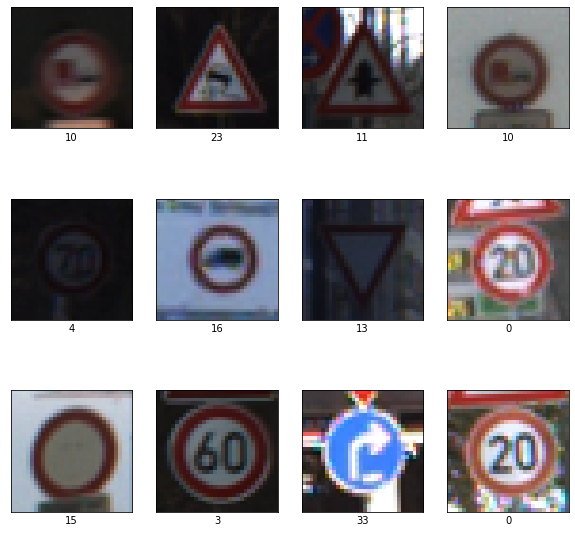

In [ ]:
plt.figure(figsize=(10, 10))
n_pictures = 12
nrow = 3
ncol = 4
pictures = np.random.randint(0, image_train.shape[0], n_pictures)
i = 0
for j in pictures:
    plt.subplot(nrow, ncol, i+1)
    plt.imshow(image_train[j])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_train[j])
    i += 1
plt.show()

##**Encoding the target**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_train = le.fit_transform(label_train)

##**Split the image_train into training and validation**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_train, target_train,
                                                  train_size=0.8,
                                                  random_state=random_seed,
                                                  stratify=target_train)


In [ ]:
print("The shape of X_train is ", X_train.shape)
print("The shape of y_train is ", y_train.shape)
print("The shape of X_val is ", X_val.shape)
print("The shape of y_val is ", y_val.shape)

The shape of X_train is  (31367, 32, 32, 3)
The shape of y_train is  (31367,)
The shape of X_val is  (7842, 32, 32, 3)
The shape of y_val is  (7842,)


##**Normalize the data**

In [ ]:
X_train_p = np.copy(X_train)
X_val_p = np.copy(X_val)

X_train = X_train / 255.0
X_val = X_val / 255.0

# **The CNN model**

##**Build the CNN model**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(32, 5, activation='relu', input_shape=X_train.shape[1:]), 
                                 keras.layers.Conv2D(32, 5, activation='relu'),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(64, 2, activation='relu'),
                                 keras.layers.Conv2D(64, 2, activation='relu'),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(32, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(43, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

##**Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'] )

##**Train the model**

In [ ]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 142s 144ms/step - loss: 1.8352 - accuracy: 0.4773 - val_loss: 0.3723 - val_accuracy: 0.8870
Epoch 2/15
981/981 [==============================] - 144s 146ms/step - loss: 0.5413 - accuracy: 0.8252 - val_loss: 0.1611 - val_accuracy: 0.9503
Epoch 3/15
981/981 [==============================] - 143s 146ms/step - loss: 0.3327 - accuracy: 0.8942 - val_loss: 0.1087 - val_accuracy: 0.9702
Epoch 4/15
981/981 [==============================] - 144s 146ms/step - loss: 0.2559 - accuracy: 0.9165 - val_loss: 0.0838 - val_accuracy: 0.9786
Epoch 5/15
981/981 [==============================] - 144s 146ms/step - loss: 0.2026 - accuracy: 0.9362 - val_loss: 0.0480 - val_accuracy: 0.9893
Epoch 6/15
981/981 [==============================] - 146s 149ms/step - loss: 0.1625 - accuracy: 0.9473 - val_loss: 0.0412 - val_accuracy: 0.9895
Epoch 7/15
981/981 [==============================] - 145s 148ms/step - loss: 0.1487 - accuracy: 0.9539 - val_loss: 0.0401 -

##**Plot accuracy and loss of training and validation**

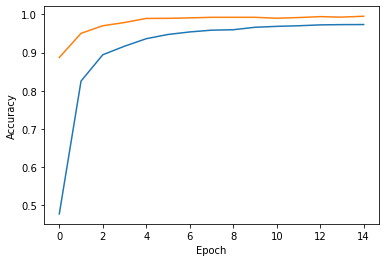

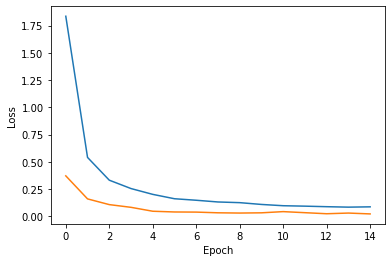

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

Text(0.5, 0, 'Epoch')

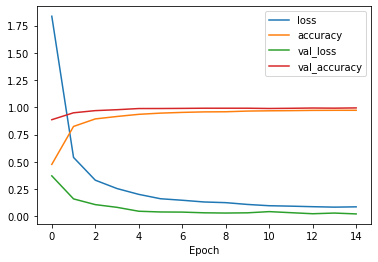

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch')

##**Load the test dataset**

In [ ]:
import pandas as pd

df_test_raw = pd.read_csv(data_path + '/Test.csv', header=0)

df_test = df_test_raw.copy(deep=True)

df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
label_test = df_test['ClassId'].to_numpy()
image_path = df_test['Path'].to_numpy()

image_test = []
image_size = 32

for i in image_path:
    image = Image.open(data_path + '/' + i)
    image = image.resize((image_size, image_size))
    image = np.array(image)
    image_test.append(image)

image_test = np.array(image_test)

print('The shape of the image_test is:', image_test.shape)
print('The shape of the label_test is:', label_test.shape)    


The shape of the image_test is: (12630, 32, 32, 3)
The shape of the label_test is: (12630,)


##**Plot the images in test datasets**

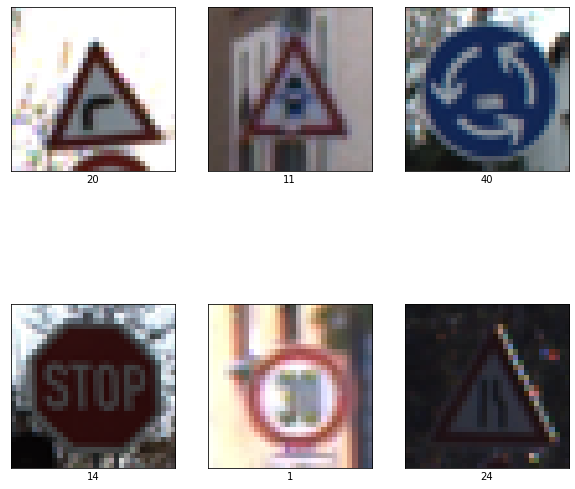

In [ ]:
plt.figure(figsize=(10, 10))
n_pictures = 6
nrow = 2
ncol = 3
pictures = np.random.randint(0, image_test.shape[0], n_pictures)
i = 0
for j in pictures:
    plt.subplot(nrow, ncol, i+1)
    plt.imshow(image_test[j])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label_test[j])
    i += 1
plt.show()

##**Encode the target and normalize image_test**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_test = le.fit_transform(label_test)

X_test = image_test / 255.0

##**Testing** 

In [ ]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)


395/395 [==============================] - 13s 34ms/step - loss: 0.1671 - accuracy: 0.9702


##**Classification report**

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78        60
           1       0.98      0.98      0.98       720
           2       0.96      0.99      0.98       750
           3       0.96      0.97      0.96       450
           4       1.00      0.98      0.99       660
           5       0.95      0.97      0.96       630
           6       0.99      0.79      0.88       150
           7       0.99      0.98      0.98       450
           8       0.97      0.98      0.97       450
           9       0.97      1.00      0.98       480
          10       0.99      0.98      0.99       660
          11       0.95      0.97      0.96       420
          12       0.99      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.95      0.97      0.96       210
          16       0.98      1.00      0.99       150
          17       1.00    

##**Save the CNN model**

In [ ]:
results_path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/midterm_project/results/'
if not os.path.exists(results_path):
    os.makedirs(results_path)

model.save(results_path + 'model.h5')

# **CNN with a Pretrained ResNet base**

##**Preprocessing the data**

In [ ]:
X_train_p_copy = np.copy(X_train_p)
X_val_p_copy = np.copy(X_val_p)
X_test_p_copy = np.copy(image_test)

X_train_p = tf.convert_to_tensor(X_train_p)
X_val_p = tf.convert_to_tensor(X_val_p)
X_test_p = tf.convert_to_tensor(image_test)

X_train_p = tf.image.resize(X_train_p, [32, 32]).numpy()
X_val_p = tf.image.resize(X_val_p, [32, 32]).numpy()
X_test_p = tf.image.resize(X_test_p, [32, 32]).numpy()


In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

X_train_p = preprocess_input(np.copy(X_train_p))
X_val_p = preprocess_input(np.copy(X_val_p))
X_test_p = preprocess_input(np.copy(X_test_p))


## **Build the CNN model with ResNet as the base**

In [ ]:
base_model = keras.applications.ResNet50(input_shape =X_train_p.shape[1:], include_top=False, weights='imagenet')

average_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)

dropout_layer = tf.keras.layers.Dropout(0.2)(average_pooling)

output = keras.layers.Dense(nclass, activation='softmax')(dropout_layer)

model_p = keras.Model(inputs=base_model.input, outputs=output)

model_p.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                             

## **Freeze the base and train the model**

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_p.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='SparseCategoricalCrossentropy', metrics=['accuracy'] )

In [ ]:
history_p = model_p.fit(X_train_p, y_train, epochs=10,
                    validation_data=(X_val_p, y_val))

Epoch 1/10
981/981 [==============================] - 175s 174ms/step - loss: 7.9457 - accuracy: 0.5314 - val_loss: 6.3754 - val_accuracy: 0.6415
Epoch 2/10
981/981 [==============================] - 173s 176ms/step - loss: 5.9338 - accuracy: 0.6693 - val_loss: 5.5556 - val_accuracy: 0.7070
Epoch 3/10
981/981 [==============================] - 171s 174ms/step - loss: 5.8170 - accuracy: 0.7066 - val_loss: 5.7682 - val_accuracy: 0.7302
Epoch 4/10
981/981 [==============================] - 171s 174ms/step - loss: 5.4549 - accuracy: 0.7338 - val_loss: 5.3844 - val_accuracy: 0.7499
Epoch 5/10
981/981 [==============================] - 170s 174ms/step - loss: 5.3339 - accuracy: 0.7524 - val_loss: 5.6190 - val_accuracy: 0.7552
Epoch 6/10
981/981 [==============================] - 169s 172ms/step - loss: 5.2181 - accuracy: 0.7604 - val_loss: 5.8978 - val_accuracy: 0.7609
Epoch 7/10
981/981 [==============================] - 169s 172ms/step - loss: 5.2136 - accuracy: 0.7737 - val_loss: 4.9993 -

Text(0.5, 0, 'Epoch')

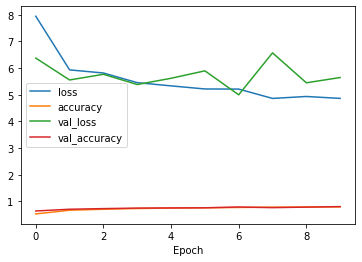

In [ ]:
pd.DataFrame(history_p.history).plot()
plt.xlabel('Epoch')

## **Unfreeze some layers in the base and train the model**

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

for layer in base_model.layers[:155]:
    layer.trainable = False

In [ ]:
model_p.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='SparseCategoricalCrossentropy', metrics=['accuracy'] )

In [ ]:
history_p = model_p.fit(X_train_p, y_train, epochs=7,
                    validation_data=(X_val_p, y_val))

Epoch 1/7
981/981 [==============================] - 885s 898ms/step - loss: 5.7743 - accuracy: 0.7566 - val_loss: 2.7221 - val_accuracy: 0.8039
Epoch 2/7
981/981 [==============================] - 887s 904ms/step - loss: 2.9421 - accuracy: 0.8065 - val_loss: 2.4208 - val_accuracy: 0.8234
Epoch 3/7
981/981 [==============================] - 866s 883ms/step - loss: 2.4530 - accuracy: 0.8237 - val_loss: 2.0367 - val_accuracy: 0.8409
Epoch 4/7
981/981 [==============================] - 836s 853ms/step - loss: 2.0189 - accuracy: 0.8412 - val_loss: 1.8819 - val_accuracy: 0.8467
Epoch 5/7
981/981 [==============================] - 834s 850ms/step - loss: 1.6376 - accuracy: 0.8546 - val_loss: 1.7558 - val_accuracy: 0.8618
Epoch 6/7
981/981 [==============================] - 857s 873ms/step - loss: 1.5209 - accuracy: 0.8690 - val_loss: 1.7024 - val_accuracy: 0.8573
Epoch 7/7
981/981 [==============================] - 863s 880ms/step - loss: 1.2723 - accuracy: 0.8747 - val_loss: 1.7341 - val_ac

Text(0.5, 0, 'Epoch')

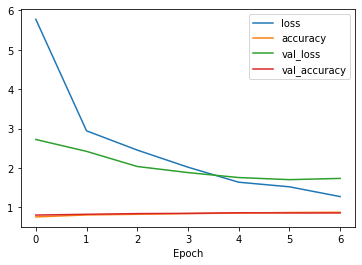

In [ ]:
pd.DataFrame(history_p.history).plot()
plt.xlabel('Epoch')

## **Testing**

In [ ]:
loss_test_p, accuracy_test_p = model_p.evaluate(X_test_p, y_test)

395/395 [==============================] - 54s 137ms/step - loss: 13.4557 - accuracy: 0.5195


In [ ]:
from sklearn.metrics import classification_report

pred = model_p.predict(X_test_p)
pred = np.argmax(pred, axis=1)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.17      0.07      0.10        60
           1       0.50      0.46      0.48       720
           2       0.34      0.41      0.37       750
           3       0.23      0.20      0.21       450
           4       0.35      0.36      0.35       660
           5       0.29      0.42      0.34       630
           6       0.76      0.73      0.74       150
           7       0.39      0.24      0.30       450
           8       0.17      0.11      0.14       450
           9       0.68      0.52      0.59       480
          10       0.57      0.78      0.66       660
          11       0.48      0.58      0.52       420
          12       0.94      0.93      0.93       690
          13       0.94      0.94      0.94       720
          14       0.91      0.79      0.85       270
          15       0.98      0.80      0.88       210
          16       0.84      0.79      0.82       150
          17       0.95    

## **Save the CNN with a ResNet base**

In [ ]:
model_p.save(results_path + 'model_p.h5')

# **discussion**

The CNN model built by ourselves has a better performance here, with test accuracy of 97%.

The possible reasons for bad performances of CNN with ResNet are:
1. It overfits the data. We can see that it has bad performances on the test datasets. And from the learning curves, we also noticed that the validation loss is much higher than the training loss. Hence, we can use dropout, data augmentation or batch normalization to handle this situation. 
2. We did not fine tune the number of layers that should be used as the base model. If the datasets here are not similar with those used in ResNet training, we should drop or replace more layers in the ResNet. 


# **References:**

The codes are base on:

1. https://data-flair.training/blogs/python-project-traffic-signs-recognition/

2. https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/code_example/code_example.ipynb

3. https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb

4. https://www.tensorflow.org/tutorials/images/cnn

5. https://www.tensorflow.org/tutorials/images/transfer_learning
